In [69]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.impute import KNNImputer


''' 
def imputacao_dados():
    #10 parece ser um valor razoavel para o tamanho da base, hmmmmm, talvez para tensao em E0 tenhamos que mudar algo?
    
    for estado in [E0, E1, E2]:
        for tipo in [CORRENTE, TENSAO]:
            
            dataExperimentList[estado][tipo] = imputer.fit_transform(dataExperimentList[estado][tipo])
            if pd.isna(dataExperimentList[estado][tipo]):print("Não deu certo,  ainda ha NaN")

print(dataExperimentList[E0][7][CORRENTE][4:7])
'''
#import openpyxl

#Constantes

E0 = 0
E1 = 1
E2 = 2


CORRENTE = 0
TENSAO = 1

#CARREGANDO OS DADOS EM DATAFRAMES
def start():
    leitor = csv.reader(open("/home/torradeira-pinguim/Documentos/Inteligencia Artificial - Rafael Stubs Parpinelli/Implementacoes-IA/Trabalho_Final/docs/MotorUniversal_2k_5kHz_SemNorm.xlsx - TesteMotorUniversalAgoraVai2000.csv","r"),delimiter=",")
    dados = list(leitor)
    dados.pop(0)
    for elemento in dados:
        for i in range(len(elemento)):
            if elemento[i]=='': elemento[i] ='NaN'

    #acess data be like data[E0][1][CORRENTE]
    #dataExperimentList  : list[list[pd.DataFrame]]

    dataExperimentList: list[list[np.ndarray]]
    dataExperimentList = [[],[],[]]
    ''' 
    for experimento in dados:
        #exp = {'corrente':experimento[1:1001],'tensao':experimento[1001:2001]}
        df = pd.DataFrame()
        df.replace(",",".")
        #df['corrente'] = pd.to_numeric(df['corrente'], errors='coerce')
        #df['tensao'] = pd.to_numeric(df['tensao'], errors='coerce')
        df['corrente'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1:1001]], errors='coerce')
        df['tensao'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1001:2001]], errors='coerce')
        dataExperimentList[int(experimento[0])].append(df)
    '''
    #imputer = KNNImputer(n_neighbors=10)
    for experimento in dados:

        df = pd.DataFrame()
        df.replace(",",".")
        #df['corrente'] = pd.to_numeric(df['corrente'], errors='coerce')
        #df['tensao'] = pd.to_numeric(df['tensao'], errors='coerce')
        df['corrente'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1:1001]], errors='coerce')
        df['tensao'] = pd.to_numeric([numero.replace(",",".") for numero in experimento[1001:2001]], errors='coerce')
        df['corrente'].fillna(df['corrente'].mean(), inplace=True)
        df['tensao'].fillna(df['tensao'].mean(), inplace=True)
        #dataExperimentList[int(experimento[0])].append(df)

        d1 = df["corrente"].to_numpy()
        #print(d1)
        d2 = df["tensao"].to_numpy()
        #print(d2)


        dataExperimentList[int(experimento[0])].append([d1,d2])
    return dataExperimentList

d0 = start()

print(d0[E0])



[[array([0.717573, 0.714725, 0.704585, 0.694305, 0.687011, 0.683188,
       0.682031, 0.682287, 0.682855, 0.683196, 0.683216, 0.683032,
       0.682879, 0.682849, 0.68281 , 0.682575, 0.681986, 0.681004,
       0.679789, 0.678534, 0.6774  , 0.676554, 0.676055, 0.675902,
       0.676135, 0.676869, 0.678152, 0.67972 , 0.681185, 0.682279,
       0.682925, 0.68328 , 0.683553, 0.683719, 0.683593, 0.683112,
       0.682276, 0.681114, 0.679794, 0.678563, 0.677633, 0.677011,
       0.676549, 0.676277, 0.676293, 0.676558, 0.677191, 0.678278,
       0.679461, 0.680297, 0.68063 , 0.680597, 0.68049 , 0.680516,
       0.68059 , 0.680394, 0.679734, 0.678724, 0.677572, 0.676403,
       0.675339, 0.674539, 0.673995, 0.673638, 0.673655, 0.674362,
       0.675838, 0.677773, 0.679645, 0.68112 , 0.682169, 0.682894,
       0.683491, 0.684078, 0.684501, 0.684608, 0.684353, 0.683681,
       0.68268 , 0.681611, 0.680735, 0.680175, 0.679829, 0.679463,
       0.679052, 0.678868, 0.679098, 0.679706, 0.680508, 0.6

In [70]:
d0[E0][7][CORRENTE][4:7]

array([0.683641  , 0.67699171, 0.675341  ])

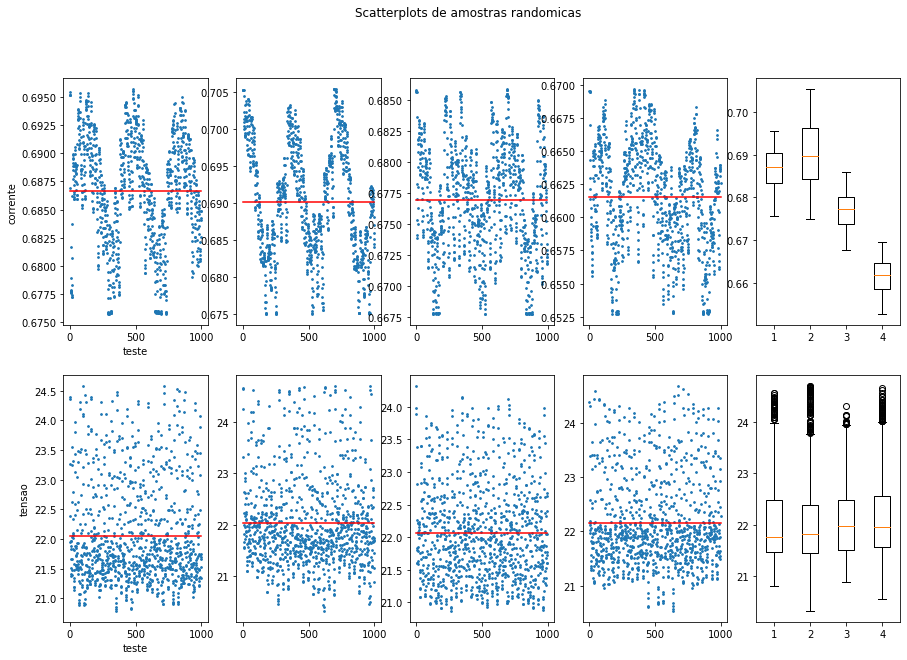

In [112]:
#Forma dos dados
#retorna grupos de 10 experimentos aleatorios
#import matplotlib
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)


def agrupamento(dataExperimentList,estado:int, quantidade=10):
    r0  = [random.randint(0,len(dataExperimentList[estado])) for i in range(quantidade)]
    return [[dataExperimentList[estado][r0[i]][CORRENTE] for i in range(quantidade)], [dataExperimentList[estado][r0[i]][TENSAO] for i in range(quantidade)]]


def analise_sem_agrupamento(teste1,dataExperimentList,estado:int, nro:int):
    fig, axs = plt.subplots(2,nro+1, figsize=(15,10))
    fig.suptitle('Scatterplots de amostras randomicas')
    for i in range(nro):
        t1 = teste1[CORRENTE][i]
        t2 = teste1[TENSAO][i]
        axs[0][i].scatter([j for j in range(len(t1))],t1, s=3)
        axs[0][i].plot([j for j in range(len(t1))], [np.mean(t1)]*len(t1), color = 'red')
        

        axs[1][i].scatter([j for j in range(len(t2))],t2, s=3)
        axs[1][i].plot([j for j in range(len(t2))], [np.mean(t2)]*len(t2), color = 'red')
    
    axs[0][nro].boxplot(teste1[CORRENTE])
    axs[1][nro].boxplot(teste1[TENSAO])


    axs[0][0].set_xlabel('teste')
    axs[0][0].set_ylabel('corrente')


    axs[1][0].set_xlabel('teste')
    axs[1][0].set_ylabel('tensao')

    plt.show()

def analise(dataExperimentList,estado:int, nro:int):
    analise_sem_agrupamento(agrupamento(dataExperimentList,estado,nro), dataExperimentList,estado, nro)

analise(d0, E0, 4)


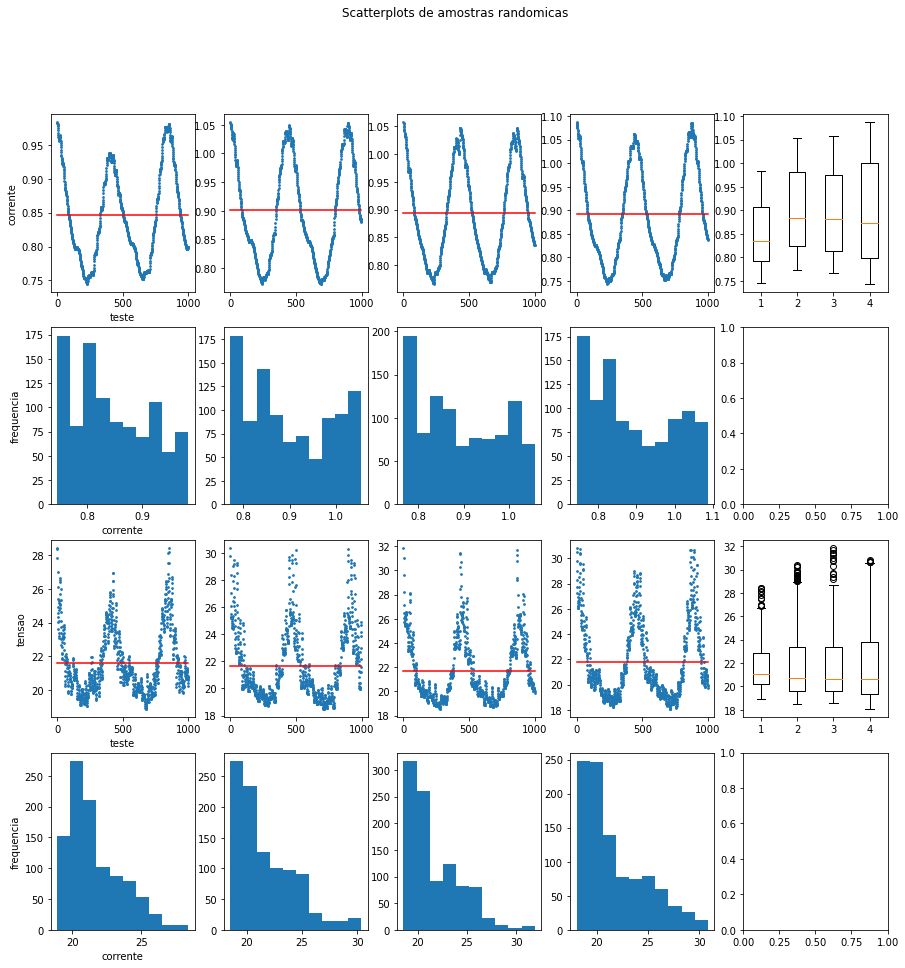

In [55]:
analise(E1,4)

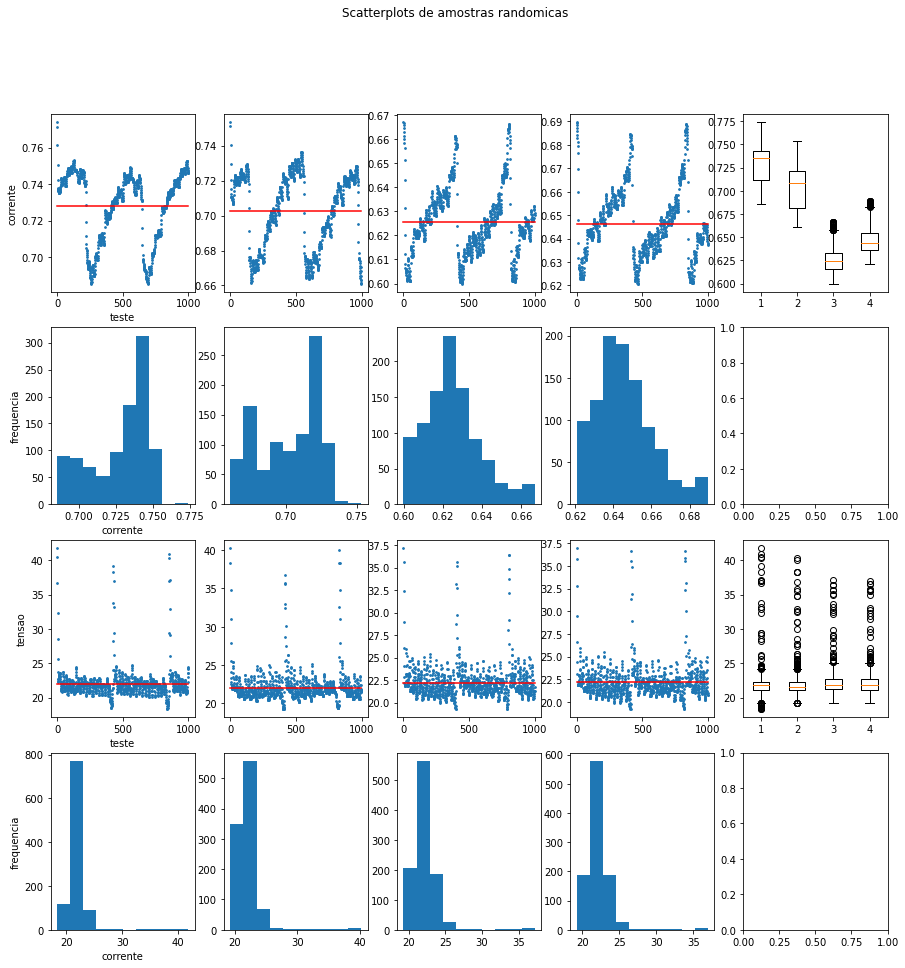

In [56]:
analise(E2,4)

In [138]:
#Limpar dados
from scipy import stats


dataProperlyHandled: list[list[np.ndarray]]

def remove_outliers(dataExperimentList,limite_inferior:float, limite_superior:float):
    dataProperlyHandled = [[],[],[]]
    for estado in [E0,E1,E2]:
        for i in range(len(dataExperimentList[estado])):
            print(i)
            d1 = dataExperimentList[i][CORRENTE]
            d2 = dataExperimentList[i][TENSAO]
            z1 = stats.mstats.zscore(d1)
            z2 = stats.mstats.zscore(d2)
            d_corrente = np.array([x for x,y in zip(d1,z1) if limite_inferior < y and y < limite_superior])
            if estado !=E2: 
                d_tensao = np.array([x for x,y in zip(d2,z2) if limite_inferior < y and y < limite_superior])
            else: 
                d_tensao = np.copy(d2)

            dataProperlyHandled[estado].append([d_corrente,d_tensao])

    return dataProperlyHandled

def cap_outliers(dataExperimentList, l_inferior, l_superior):
    xdados = []
    xlabel = []
    for estado in [E0,E1,E2]:
        for i in range(len(dataExperimentList[estado])):
            d1 = dataExperimentList[estado][i][CORRENTE]
            d2 = dataExperimentList[estado][i][TENSAO]

            
            devio1 = np.std(d1)
            media1 = np.mean(d1)
            minimo1 = l_inferior*devio1 + media1
            maximo1 = l_superior*devio1 + media1

            devio2 = np.std(d2)
            media2 = np.mean(d2)
            minimo2 = l_inferior*devio2 + media2
            maximo2 = l_superior*devio2 + media2
            

            z1 = stats.mstats.zscore(d1)
            z2 = stats.mstats.zscore(d2)
        
            d1_1th_p = np.percentile(d1, 1)
            d1_99th_p = np.percentile(d1,95)
            d2_1th_p = np.percentile(d2, 1)
            d2_99th_p = np.percentile(d2, 95)

            d1_2th_p = np.percentile(d1,2)
            d1_98th_p = np.percentile(d1,90)
            d2_2th_p = np.percentile(d2,2)
            d2_98th_p = np.percentile(d2,90)

            '''
            for j in range(len(d1)):
                if z1[j] < l_inferior: d1[j] = random.uniform(minimo1,d1_1th_p)
                elif z1[j] > l_superior: d1[j] = random.uniform(d1_99th_p, maximo1)
            for j in range(len(d2)):
                if z2[j] < l_inferior: d2[j] = random.uniform(d2_1th_p,d2_2th_p)
                elif z2[j] > l_superior: random.uniform(d2_98_th_p,d2_99th_p)
            '''
            


            for j in range(len(d1)):
                if z1[j] < l_inferior: d1[j] = random.uniform(d1_1th_p,d1_2th_p)
                elif z1[j] > l_superior: d1[j] = random.uniform(d1_98th_p, d1_99th_p)
            for j in range(len(d2)):
                if z2[j] < l_inferior: d2[j] = random.uniform(d2_1th_p,d2_2th_p)
                elif z2[j] > l_superior: d2[j] = random.uniform(d2_98th_p, d2_99th_p)
            
            xdados.append([d1,d2/np.linalg.norm(d2)])
            xlabel.append(estado)

    return (np.array(xdados),np.array(xlabel))

xdados,xlabel = cap_outliers(d0,-3.0,3.0)
#analise(d0,E0,4)
#analise(d0,E1,4)
#analise(d0,E2,4)

#print(d1)


In [164]:
from sklearn.model_selection import train_test_split

xdados_treino, xdados_bloco, xlabel_treino, xlabel_bloco = train_test_split(xdados,xlabel,test_size=0.30)

"base de treino"
xdados_teste, xdados_validacao, xlabel_teste, xlabel_validacao = train_test_split(xdados_bloco,xlabel_bloco,test_size=0.5)
"base de teste"


'base de teste'

In [137]:
print(xdados_treino.shape)
print(xlabel_treino)

(281, 2, 1000)
[0 1 2 0 0 0 1 1 2 0 1 0 2 2 2 0 1 1 1 0 0 0 0 0 1 0 2 1 0 1 1 0 0 2 0 0 0
 0 0 1 0 1 0 0 1 2 0 2 2 0 0 0 2 0 0 2 1 0 0 0 1 0 2 1 0 0 0 0 0 0 1 2 0 1
 0 0 0 2 2 2 1 0 0 0 0 0 2 0 1 2 1 0 1 0 0 0 0 1 1 0 0 2 0 0 1 2 0 1 0 0 2
 0 0 0 1 0 2 0 0 2 0 2 0 0 1 1 0 0 0 0 0 0 0 1 0 2 1 0 1 0 1 0 2 1 1 2 0 2
 0 2 2 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 2 0 0 0 0 0 0 2 0 1 0 0 0 2 1 1 0 0
 0 0 0 0 0 1 0 2 0 0 0 2 1 2 0 0 0 0 1 0 0 1 0 2 0 1 0 1 1 1 0 2 1 1 2 1 0
 0 0 0 1 2 0 1 2 0 0 0 0 2 0 0 1 0 0 0 0 1 0 0 0 0 2 0 0 2 1 0 0 2 0 2 0 0
 1 0 0 1 2 0 0 0 1 0 0 2 2 2 0 0 2 1 0 2 2 0]


In [185]:
#IA FINALMENTE IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class_names = ['corrente','tensao','estado']


input_shape = xdados_treino.shape

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,1000)),
    keras.layers.Dense(128,activation = "sigmoid"),
    keras.layers.Dense(128,activation = "relu")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xdados_treino, xlabel_treino, validation_data=(xdados_validacao, xlabel_validacao),epochs=10)
print('TESTE')
model.evaluate(xdados_teste, xlabel_teste)


Epoch 1/10
11/11 [==============================] - 1s 23ms/step - loss: 3.3434 - accuracy: 0.5257 - val_loss: 1.7558 - val_accuracy: 0.6933
Epoch 2/10
11/11 [==============================] - 0s 9ms/step - loss: 1.4389 - accuracy: 0.5743 - val_loss: 1.2365 - val_accuracy: 0.6933
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 1.1399 - accuracy: 0.5743 - val_loss: 1.0986 - val_accuracy: 0.6933
Epoch 4/10
11/11 [==============================] - 0s 10ms/step - loss: 1.0986 - accuracy: 0.5743 - val_loss: 1.0986 - val_accuracy: 0.6933
Epoch 5/10
11/11 [==============================] - 0s 10ms/step - loss: 1.0986 - accuracy: 0.5743 - val_loss: 1.0986 - val_accuracy: 0.6933
Epoch 6/10
11/11 [==============================] - 0s 11ms/step - loss: 1.0986 - accuracy: 0.5743 - val_loss: 1.0986 - val_accuracy: 0.6933
Epoch 7/10
11/11 [==============================] - 0s 11ms/step - loss: 1.0986 - accuracy: 0.5743 - val_loss: 1.0986 - val_accuracy: 0.6933
Epoch 8/10
11/1

[1.098616361618042, 0.6266666650772095]

In [159]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='/home/torradeira-pinguim/Documentos/Inteligencia Artificial - Rafael Stubs Parpinelli/Implementacoes-IA/Trabalho_Final/models/plot.png',
    show_shapes=True,
    show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
